giovanni gorgio but everybody calls me gorgio 

In [4]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
a = np.arange(100).reshape(10,10) 

# 1) Let's import dataset from the address. 

In [6]:
url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'   
df = pd.read_csv(url)
url2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'


In [ ]:
df.head(10)
df = df.rename(columns={'Unnamed: 0': 'Index'})
df.head(100) 
weather = pd.read_csv(url2, sep = ',', index_col = 0)
weather.head(10) 


# 2) Let's do smth interesting using our imported data. E.g exploring, when the delay time is the greatest. Lets hope, that our data is normilized enough, so we can compare it in each column with ease. Actually, we should clear our data first 

In [61]:
len(df)
numeric_data = df.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
df = df.fillna(numeric_data_mean)
df.tail(10) 
categorical = list(df.dtypes[df.dtypes == "object"].index) 
df[categorical] = df[categorical].dropna(how = 'any') # отлично, теперь все данные у нас есть 

In [29]:
df.shape
df['month'].unique()
df['total'] = df['dep_delay'] + df['arr_delay']
k = df.sample(n =15000).groupby("month")['total'].mean().sort_values()[::-1]
print(k)
print('Max val is for %dnd month!'%k.index[0]) 
print('The deviation from mean is', k.max()-df.total.mean()) 
print('The mean delay in July is :', k[1])

month
6     40.911891
12    31.183486
7     30.459482
4     24.399670
3     19.061306
8     17.763867
1     16.560935
5     16.235842
2     14.713084
10     4.223438
9      4.021382
11     3.544636
Name: total, dtype: float64
Max val is for 6nd month!
The deviation from mean is 21.461358040584347
The mean delay in July is : 16.56093489148581


# 3) Firstly, lets explore the "most delayed" months and think, what we can do about it. Take the mean delay in each month and create a pie chart, showing things 

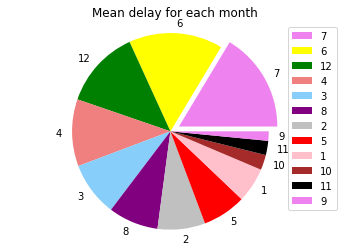

In [286]:
k_label = df.groupby("month")['arr_delay'].mean().sort_values()[::-1]
a = a
labels = [7, 6, 12, 4 , 3 , 8, 2, 5 ,1, 10, 11, 9]
sizes = k
colors = ['violet', 'yellow', 'green', 'lightcoral', 'lightskyblue', 'purple', 'silver', 'red','pink', 'brown','black']
explode = (0.1, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors)
x_title = ('number of month')
plt.axis('equal')
plt.title('Mean delay for each month')
plt.legend() 
plt.show()


# What can we say about it? The biggest delay was in July and June according to the pie chart above. Next december goes. So we can conclude, that on holidays the delay is significantly increasing. This can be due to the lack of personal during these months as well. Solution: the number of personal should be increased in these months  

# 4) Lets do the same thing with destination and mean delay(may be it has to do someting about it). Lets exclude dep_delay, because it has nothing to do with the actual destination 

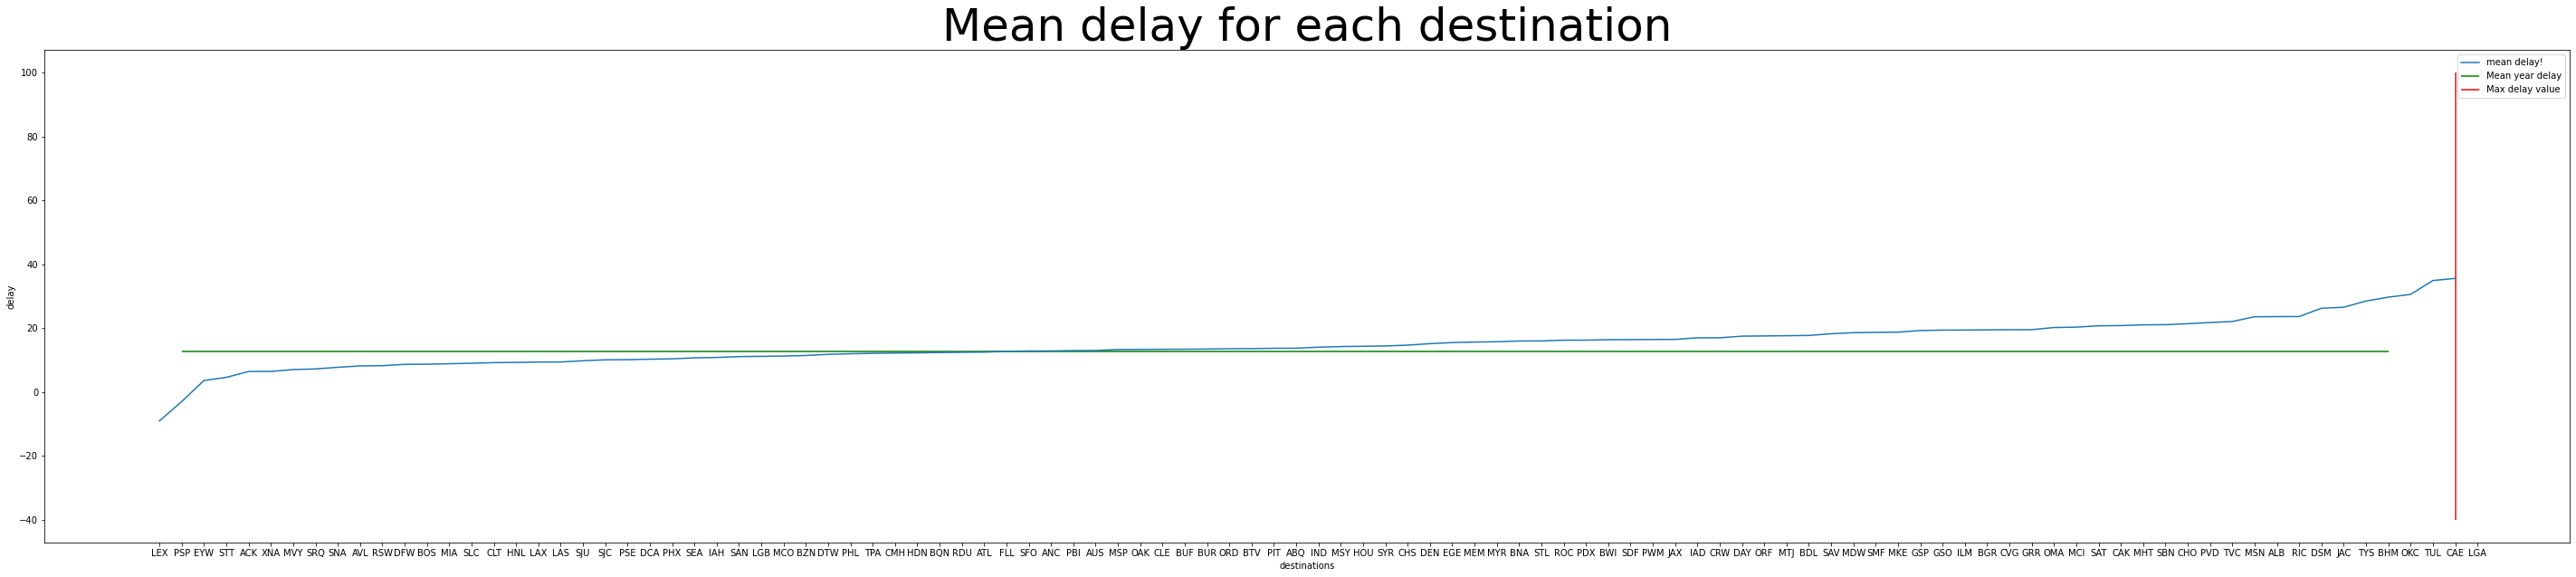

The max delay was for the CAE destination!


In [287]:
k = df.groupby("dest")['dep_delay'].mean().sort_values() 
m = df['dep_delay'].mean()
mean_overall = df['dep_delay'].mean() 
x = k.index 
y = k 
plt.figure(figsize=(50,10))
plt.title("Mean delay for each destination", size = 50)
plt.plot(x,y,label = 'mean delay!' ) 
plt.xlabel("destinations")
plt.ylabel("delay")
plt.hlines (m, 1, 100, colors = 'g', label = 'Mean year delay')
plt.vlines (df.groupby("dest")['dep_delay'].mean().idxmax(),-40,100, colors = 'r', label = 'Max delay value')
plt.legend()
plt.show()
print('The max delay was for the %s destination!'%df.groupby("dest")['dep_delay'].mean().idxmax())

# The solution to these is either cut down flights to these states(which are higer on the plot) or simply pay better attention for the service in these airports, hire more people! 

# 5) Now, let's observe the dependance of delays on the day of the week 



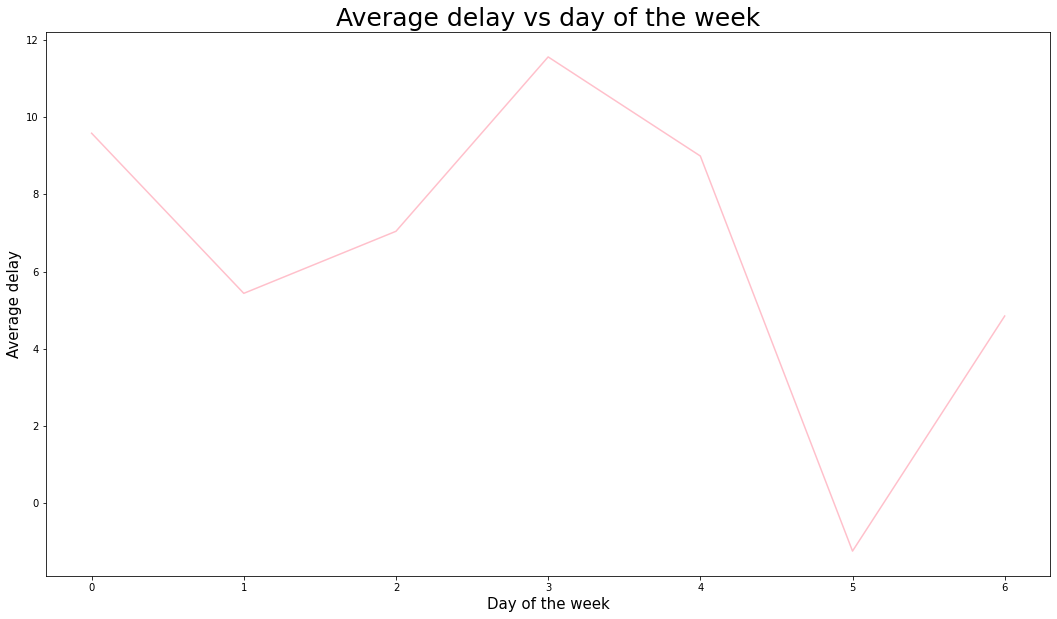

In [67]:
df['weekday'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])
df['time'] = df['weekday'].apply(lambda x: x.dayofyear) # зд
df['day of the week'] = df['weekday'].apply(lambda x: x.day_of_week)
k = df.groupby('day of the week')['arr_delay'].mean()
plt.figure(figsize=(18,10))
plt.plot(k.index, k, color='pink')
plt.xlabel('Day of the week', size=15)
plt.ylabel('Average delay', size=15)
plt.title('Average delay vs day of the week', size=25)
plt.show()

# The biggest delays are on tuesdays as we can see!

# 6) Lets explore the weather conditions vs arr_delays 

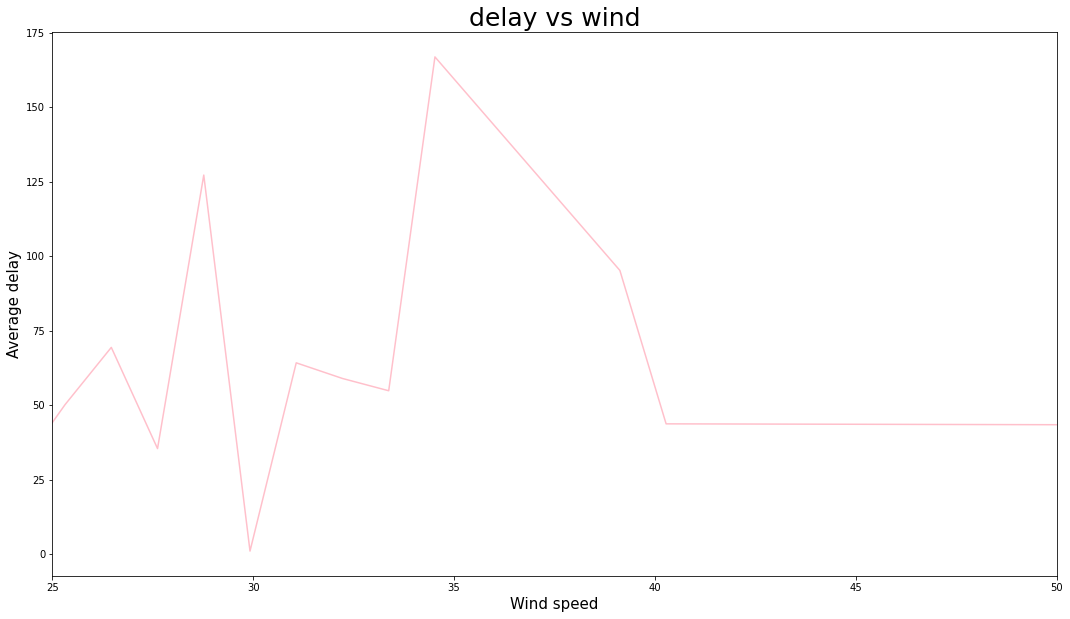

,Index,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,...,day of the week,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,20,2013,1,1,601.0,1.0,844.0,-6.0,B6,N644JB,...,1,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
1,23,2013,1,1,606.0,-4.0,858.0,-12.0,AA,N633AA,...,1,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
2,25,2013,1,1,607.0,0.0,858.0,-17.0,UA,N53442,...,1,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
3,26,2013,1,1,608.0,8.0,807.0,32.0,MQ,N9EAMQ,...,1,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
4,30,2013,1,1,615.0,0.0,833.0,-9.0,DL,N326NB,...,1,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0


In [92]:
df_weather = df.merge(weather, on=['year', 'month', 'day', 'hour', 'origin'], how='inner' )
df_weather.head(10) 
df['total'] = df['dep_delay'] + df['arr_delay']
k = df_weather.groupby('wind_speed')['total'].mean()
plt.figure(figsize=(18,10))

plt.plot(k.index, k, color='pink')
plt.xlabel('Wind speed', size=15)
plt.ylabel('Average delay', size=15)
plt.title('delay vs wind', size=25)
plt.xlim(25,50)
plt.show()  
df_weather.head()

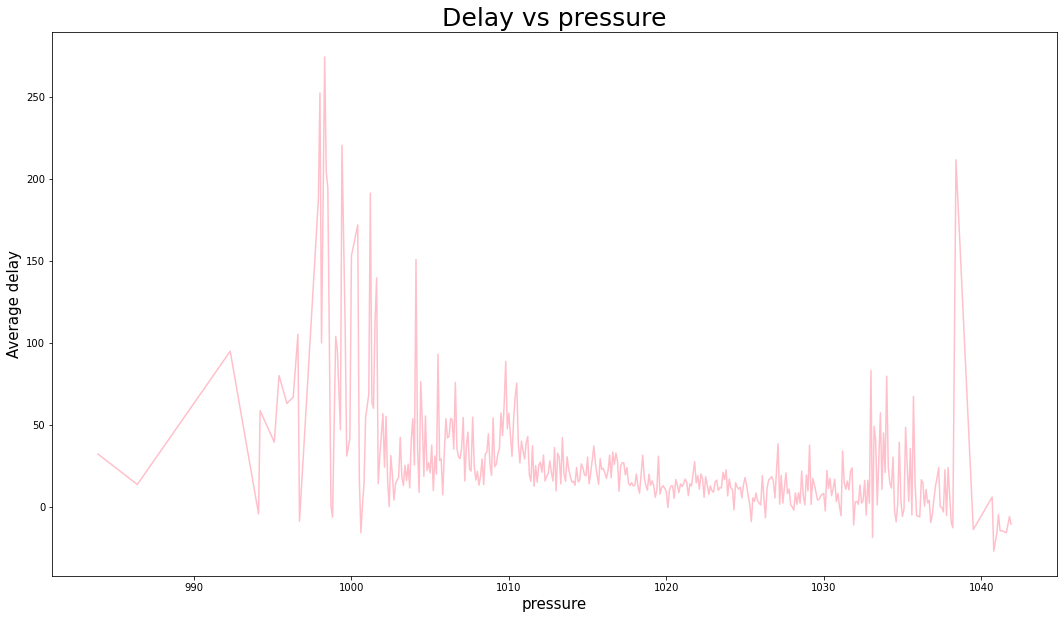

In [87]:
k = df_weather.groupby('pressure')['total'].mean()
plt.figure(figsize=(18,10))
plt.plot(k.index, k, color='pink')
plt.xlabel('pressure', size=15)
plt.ylabel('Average delay', size=15)
plt.title('Delay vs pressure', size=25)
plt.show()



# As we can see, there is a small dependancy of delays on the weather conditions

# 7) Delays in dependancy of the companies

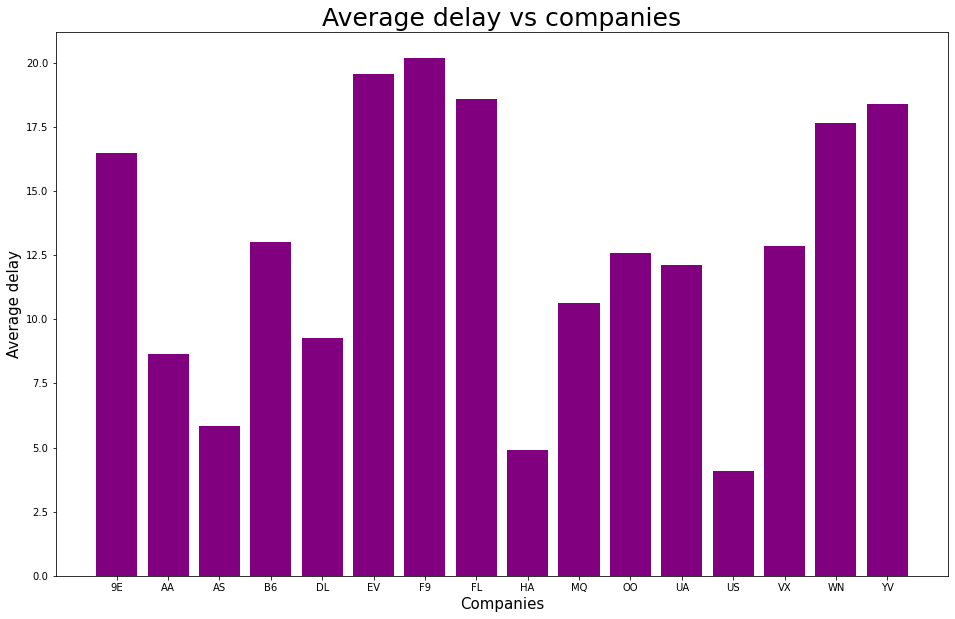

In [91]:
k = df.groupby(['carrier'])['dep_delay'].mean()
plt.figure(figsize=(16,10))
plt.bar(k.index, k, color='purple')
plt.xlabel('Companies',size=15)
plt.ylabel('Average delay', size=15)
plt.title('Average delay vs companies', size=25)
plt.show() 

# US AA AS are the best companies  

# 8) Dependance of delays on the humidity 

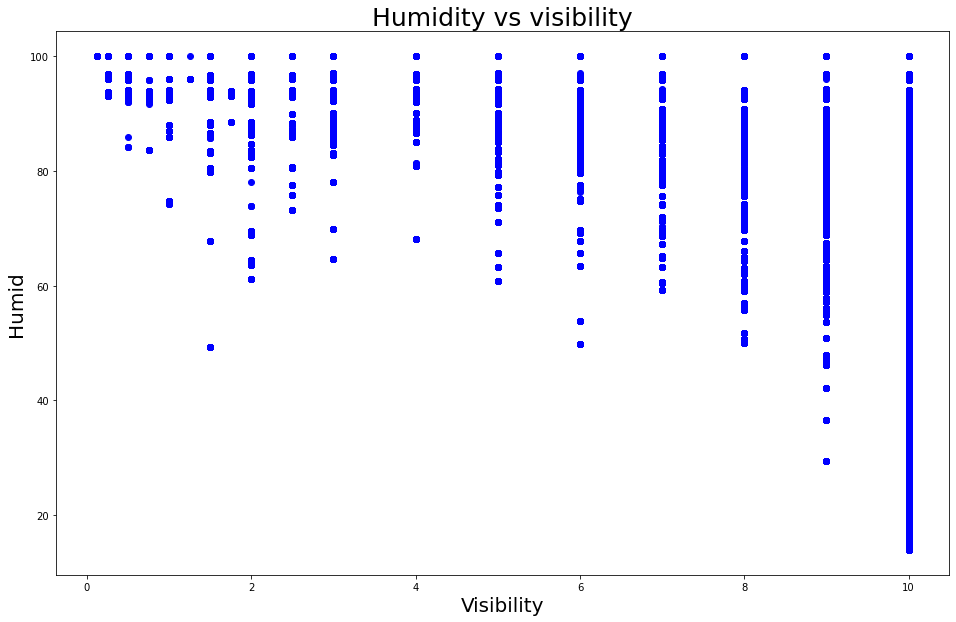

In [95]:
plt.figure(figsize=(16,10))
plt.scatter(df_weather['visib'], df_weather['humid'], c='blue')
plt.xlabel('Visibility', size=20)
plt.ylabel('Humid', size=20)
plt.title('Humidity vs visibility', size=25)
plt.show()

# We can see that , the bigger the humid the bigger delays are 

# Final Overview: We can conclude that there are many factors that matter on delays such as holidays, weather, days of the week, company.  